In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('../datasets/pengajuan_kredit_simple.csv')

In [3]:
data.head(14)

,penghasilan,pekerjaan,sosial,status_rumah,layak_kredit
0,rendah,swasta,ya,HM,layak
1,rendah,ASN,tidak,kontrak,tidak layak
2,rendah,pengusaha,tidak,HM,tidak layak
3,rendah,pengusaha,ya,kontrak,layak
4,sedang,swasta,ya,kontrak,tidak layak
5,tinggi,swasta,ya,HM,layak
6,rendah,ASN,tidak,HM,tidak layak
7,sedang,pengusaha,tidak,HM,layak
8,sedang,swasta,ya,HM,layak
9,sedang,pengusaha,tidak,kontrak,tidak layak


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   penghasilan   14 non-null     object
 1   pekerjaan     14 non-null     object
 2   sosial        14 non-null     object
 3   status_rumah  14 non-null     object
 4   layak_kredit  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [8]:
data.isnull().sum()

penghasilan     0
pekerjaan       0
sosial          0
status_rumah    0
layak_kredit    0
dtype: int64

In [9]:
encoder = LabelEncoder()

In [11]:
data['penghasilan'] = encoder.fit_transform(data['penghasilan'].values)
data['pekerjaan'] = encoder.fit_transform(data['pekerjaan'].values)
data['sosial'] = encoder.fit_transform(data['sosial'].values)
data['status_rumah'] = encoder.fit_transform(data['status_rumah'].values)

In [12]:
data.head(14)

,penghasilan,pekerjaan,sosial,status_rumah,layak_kredit
0,0,2,1,0,layak
1,0,0,0,1,tidak layak
2,0,1,0,0,tidak layak
3,0,1,1,1,layak
4,1,2,1,1,tidak layak
5,2,2,1,0,layak
6,0,0,0,0,tidak layak
7,1,1,0,0,layak
8,1,2,1,0,layak
9,1,1,0,1,tidak layak


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   penghasilan   14 non-null     int32 
 1   pekerjaan     14 non-null     int32 
 2   sosial        14 non-null     int32 
 3   status_rumah  14 non-null     int32 
 4   layak_kredit  14 non-null     object
dtypes: int32(4), object(1)
memory usage: 464.0+ bytes


In [14]:
atribut = data.drop(columns='layak_kredit')
atribut.head(14)

,penghasilan,pekerjaan,sosial,status_rumah
0,0,2,1,0
1,0,0,0,1
2,0,1,0,0
3,0,1,1,1
4,1,2,1,1
5,2,2,1,0
6,0,0,0,0
7,1,1,0,0
8,1,2,1,0
9,1,1,0,1


In [15]:
kelas = data['layak_kredit']
kelas.head(14)

0           layak
1     tidak layak
2     tidak layak
3           layak
4     tidak layak
5           layak
6     tidak layak
7           layak
8           layak
9     tidak layak
10          layak
11          layak
12          layak
13          layak
Name: layak_kredit, dtype: object

In [16]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=10, min_samples_split=4, min_samples_leaf=2)
dt.fit(atribut, kelas)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=4, random_state=10)

In [19]:
dtesting = dt.predict([[1,2,0,0]])
print('Jika penghasilan sedang, pekerjaan swasta, hub. sosial butuk, status rumah HM, maka masuk ke dalam kelas', dtesting)

Jika penghasilan sedang, pekerjaan swasta, hub. sosial butuk, status rumah HM, maka masuk ke dalam kelas ['layak']


In [28]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file="tree_kredit.dot", class_names=["layak", "tidak_layak"], 
                feature_names=atribut.columns, impurity=False, filled=True)

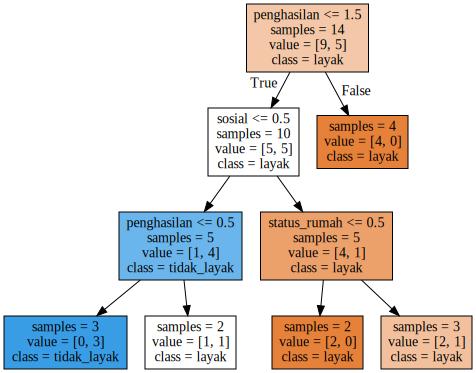

In [29]:
import graphviz

with open("tree_kredit.dot") as fig:
    dot_graph = fig.read()
graphviz.Source(dot_graph)

In [14]:
dtesting = dt.predict([[0,0,0,1]])
dtesting

array(['tidak layak'], dtype=object)